<a href="https://colab.research.google.com/github/sonakshisharan/Machine_Learning/blob/main/FM(Financial%20Management%20project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group-14

*   2020B5A41008H MOHANA RAMANAN
*   2021A8PS3002H SONAKSHI SHARAN
*   2021A7PS1830H AMOL BIMLESH AUDICHYA
*   2020B3AA2162H DHRUV GOPAL
*   2021A3PS1022H AITHA RUTHVIIK
*   2020B3A71815H TANMAY BHETHANABHOTLA








In [ ]:
import numpy as np
import scipy.optimize as sc
import statsmodels.api as sm
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import plotly.express as px
yf.pdr_override()
from google.colab import drive

In [ ]:
def getStockData(stocks,start,end):
    stock_symbols = ','.join(stocks)
    stockData=pdr.get_data_yahoo(stock_symbols,start=start,end=end,interval='1mo')
    stockData=stockData['Adj Close']
    return stockData

In [ ]:
def getMonthlyReturns(stock_data):
    monthlyReturns=np.log(stock_data/stock_data.shift(1))
    monthlyReturns=monthlyReturns.dropna()
    return monthlyReturns

In [ ]:
stocks=['WIPRO.BO','^BSESN']
start='2018-04-01' # 1 April,2018 FY 2018
end='2023-03-31'
stock_data=getStockData(stocks,start,end)
getMonthlyReturns(stock_data)

[*********************100%%**********************]  2 of 2 completed


,WIPRO.BO,^BSESN
Date,,
2018-05-01,-0.062353,0.004597
2018-06-01,-0.001911,0.002858
2018-07-01,0.057243,0.059804
2018-08-01,0.085972,0.027240
2018-09-01,0.072093,-0.064611
2018-10-01,0.022267,-0.050530
2018-11-01,-0.020264,0.049623
2018-12-01,0.016486,-0.003487
2019-01-01,0.111759,0.005209


In [ ]:
X=np.array([getMonthlyReturns(stock_data)['^BSESN']])
X=X.reshape(-1,1)

y=np.array([getMonthlyReturns(stock_data)['WIPRO.BO']])
y=y.reshape(-1,1)

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     5.557
Date:                Wed, 08 Nov 2023   Prob (F-statistic):             0.0219
Time:                        09:34:57   Log-Likelihood:                 66.127
No. Observations:                  59   AIC:                            -128.3
Df Residuals:                      57   BIC:                            -124.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.011      0.534      0.5

In [ ]:
Beta_Levered_TopDown=model.params[1].round(3)
print("Levered Beta for Wipro calculated using Top Down Approach is: ",Beta_Levered_TopDown)

Levered Beta for Wipro calculated using Top Down Approach is:  0.439


# CAPM Model

The CAPM (Capital Asset Pricing Model) is represented by the following equation:

$$
E(r_s) = r_f + \beta (E(r_m) - r_f)
$$

Where:
- E($r_s$) is the expected return on the investment (Cost of Equity).
- E($r_m$) is the expected return of the market.
- $r_f$ is the risk-free rate.
- $\beta$ is the beta, which measures the sensitivity of the investment's returns to market returns.

This equation helps in estimating the expected return on an investment based on its risk, market conditions, and the risk-free rate.


In [ ]:
Expected_market_return=(1+getMonthlyReturns(stock_data)['^BSESN'].mean())**12-1
Risk_Free_Rate=0.0557

Cost_of_Equity_TopDown = Risk_Free_Rate + Beta_Levered_TopDown*(Expected_market_return - Risk_Free_Rate)
print("Cost of Equity calculated using Top Down approach is: ",Cost_of_Equity_TopDown)

Cost of Equity calculated using Top Down approach is:  0.07974734817300763


# Wipro Limited Balance Sheet
Source:- https://finance.yahoo.com/quote/WIPRO.BO/balance-sheet?p=WIPRO.BO

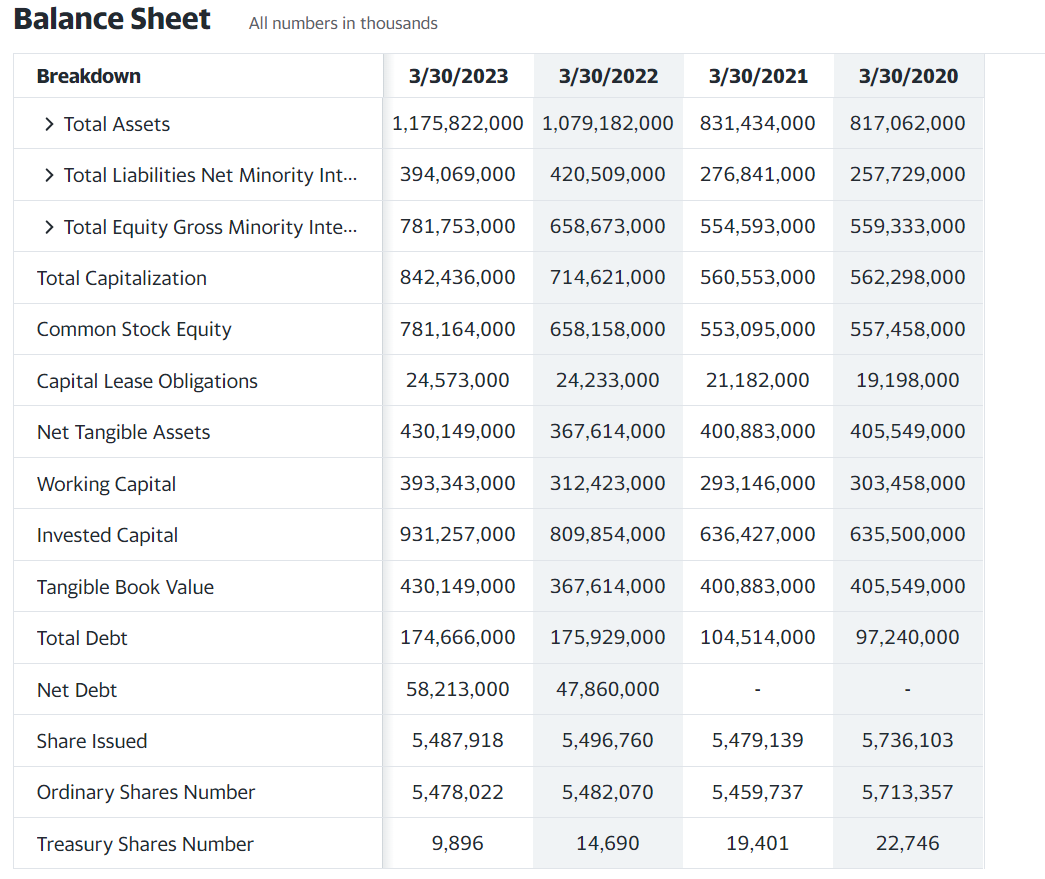

In [ ]:
debt_wipro=174666000
equity_wipro=781753000
debt_to_equity_wipro=debt_wipro/equity_wipro
print('Debt to Equity Ratio of Wipro: ',debt_to_equity_wipro)

Debt to Equity Ratio of Wipro:  0.22342862771233368


In [ ]:
ticker_symbol = "WIPRO.BO"
company = yf.Ticker(ticker_symbol)
income_statement = company.financials
ebit = income_statement.loc["EBIT"]
interest_expense = income_statement.loc["Interest Expense"]
interest_coverage_ratio = ebit/interest_expense
print(f"Interest Expense Ratio in FY 2023 for {ticker_symbol} is: {interest_coverage_ratio.iloc[0]}")


Interest Expense Ratio in FY 2023 for WIPRO.BO is: 15.652872878832985


#### Large Cap
The market cap of these companies is significantly high, coming in at around Rs. 20,000 crores or more.
#### Mid Cap
The market cap generally tends to range from Rs. 5,000 to Rs. 20,000 crores.
#### Small Cap
The market cap is generally below Rs. 5,000 crores


The market Cap of Wipro is 2.043T=204300 crore( as of 23/10/2023 ) which is greater than 20000 thus Wipro is a Large Cap company

####  Interest Coverage Ratios and Ratings: High Market Cap Firms
| Interest Coverage Ratio | Rating | Spread   |
|-------------------------|--------|----------|
| > 8.5                   | AAA    | 0.75%    |
| 6.5 - 8.5              | AA     | 1.00%    |
| 5.5 - 6.5              | A+     | 1.50%    |
| 4.25 - 5.5             | A      | 1.80%    |
| 3 - 4.25               | A-     | 2.00%    |
| 2.5 - 3                | BBB    | 2.25%    |
| 2 - 2.5                | BB     | 3.50%    |
| 1.75 - 2               | B+     | 4.75%    |
| 1.5 - 1.75             | B      | 6.50%    |
| 1.25 - 1.5            | B-     | 8.00%    |
| 0.8 - 1.25             | CCC    | 10.00%   |
| 0.65 - 0.8            | CC     | 11.50%   |
| 0.2 - 0.65             | C      | 12.70%   |
| < 0.2                  | D      | 14.00%   |


Since the Interest coverage ratio of Wipro is 15.65 which is >8.5 so the
Rating for Wipro is AAA
Spread=0.0075

In [ ]:
spread=0.0075
Cost_of_Debt=Risk_Free_Rate+spread
print(Cost_of_Debt)

0.0632


## WACC Formula
$$ R_{\text{WACC}} = R_s \cdot \left(\frac{E}{V}\right) + R_d \cdot \left(1 - T\right) \cdot \left(\frac{D}{V}\right) $$

Where:
- $R_{\text{WACC}}$ is the weighted average cost of capital.
- $R_s$ is the cost of equity
- $ R_d$ is the cost of debt.
- $ E$ is the market value of equity.
- $ D$ is the market value of debt.
- $ V$ is the total value of the firm.
- $ T$ is the Corporate tax rate.


In [ ]:
TaxRate=0.25
debt_weight=1/(1+(1/debt_to_equity_wipro))
equity_weight=1/(1+debt_to_equity_wipro)

R_wacc_TopDown=Cost_of_Equity_TopDown*(equity_weight)+Cost_of_Debt*(1-TaxRate)*debt_weight
print("Cost of Capital to Wipro using top down approach: ",R_wacc_TopDown)

Cost of Capital to Wipro using top down approach:  0.07383991438511076


# BOTTOM-UP Approach

*   List item
*   List item



## Comparable companies in IT industry BSE
* Infosys Limited
* HCL Technologies Limited
* LTIMindtree Limited
* Tech Mahindra Limited

In [ ]:
stocks=['INFY.BO','HCLTECH.BO','LTIM.BO','TECHM.BO','^BSESN']
stock_data=getStockData(stocks,start,end)
getMonthlyReturns(stock_data)

[*********************100%%**********************]  5 of 5 completed


,HCLTECH.BO,INFY.BO,LTIM.BO,TECHM.BO,^BSESN
Date,,,,,
2018-05-01,-0.143774,0.026736,0.102024,0.058419,0.004597
2018-06-01,0.022095,0.058986,-0.039001,-0.081161,0.002858
2018-07-01,0.040075,0.043611,0.112315,0.035687,0.059804
2018-08-01,0.081238,0.053489,-0.039972,0.116819,0.027240
2018-09-01,0.039030,0.010844,0.062609,-0.026036,-0.064611
2018-10-01,-0.034881,-0.058853,-0.081550,-0.001074,-0.050530
2018-11-01,-0.035255,-0.029202,-0.115884,-0.053336,0.049623
2018-12-01,-0.052467,-0.010028,0.094609,0.021871,-0.003487
2019-01-01,0.043356,0.127527,0.018377,0.016163,0.005209


In [ ]:
X=np.array([getMonthlyReturns(stock_data)['^BSESN']])
X=X.reshape(-1,1)

y1=np.array([getMonthlyReturns(stock_data)['INFY.BO']])
y1=y1.reshape(-1,1)

y2=np.array([getMonthlyReturns(stock_data)['HCLTECH.BO']])
y2=y2.reshape(-1,1)

y3=np.array([getMonthlyReturns(stock_data)['LTIM.BO']])
y3=y3.reshape(-1,1)

y4=np.array([getMonthlyReturns(stock_data)['TECHM.BO']])
y4=y4.reshape(-1,1)

X=sm.add_constant(X)

model_infosys=sm.OLS(y1,X).fit()
model_hcl=sm.OLS(y2,X).fit()
model_ltim=sm.OLS(y3,X).fit()
model_techm=sm.OLS(y4,X).fit()

# Infosys Balance Sheet
Source:- https://finance.yahoo.com/quote/INFY.BO/balance-sheet?p=INFY.BO

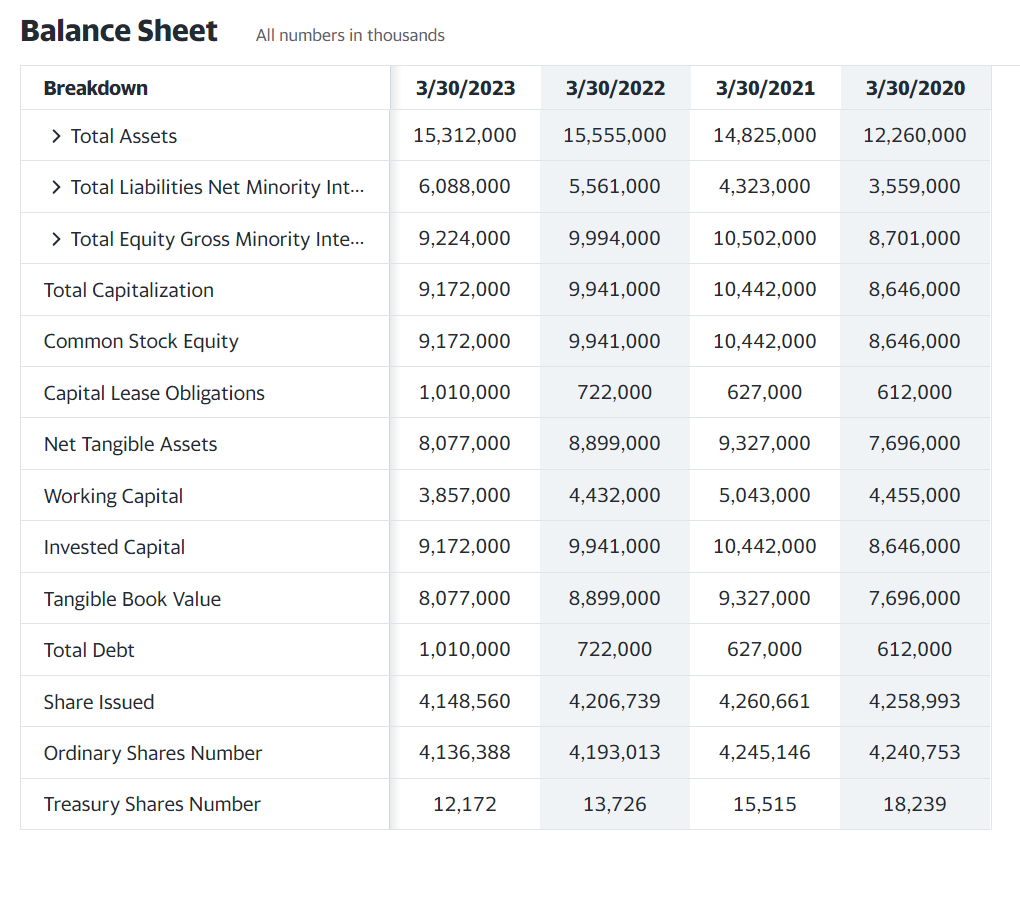

In [ ]:
debt_infosys=1010000
equity_infosys=9224000
debt_to_equity_infosys=debt_infosys/equity_infosys
print('Debt to Equity Ratio of Infosys: ',debt_to_equity_infosys)

Debt to Equity Ratio of Infosys:  0.10949696444058976


# HCL Technologies Limited Balance Sheet
Source:- https://finance.yahoo.com/quote/HCLTECH.BO/balance-sheet?p=HCLTECH.BO

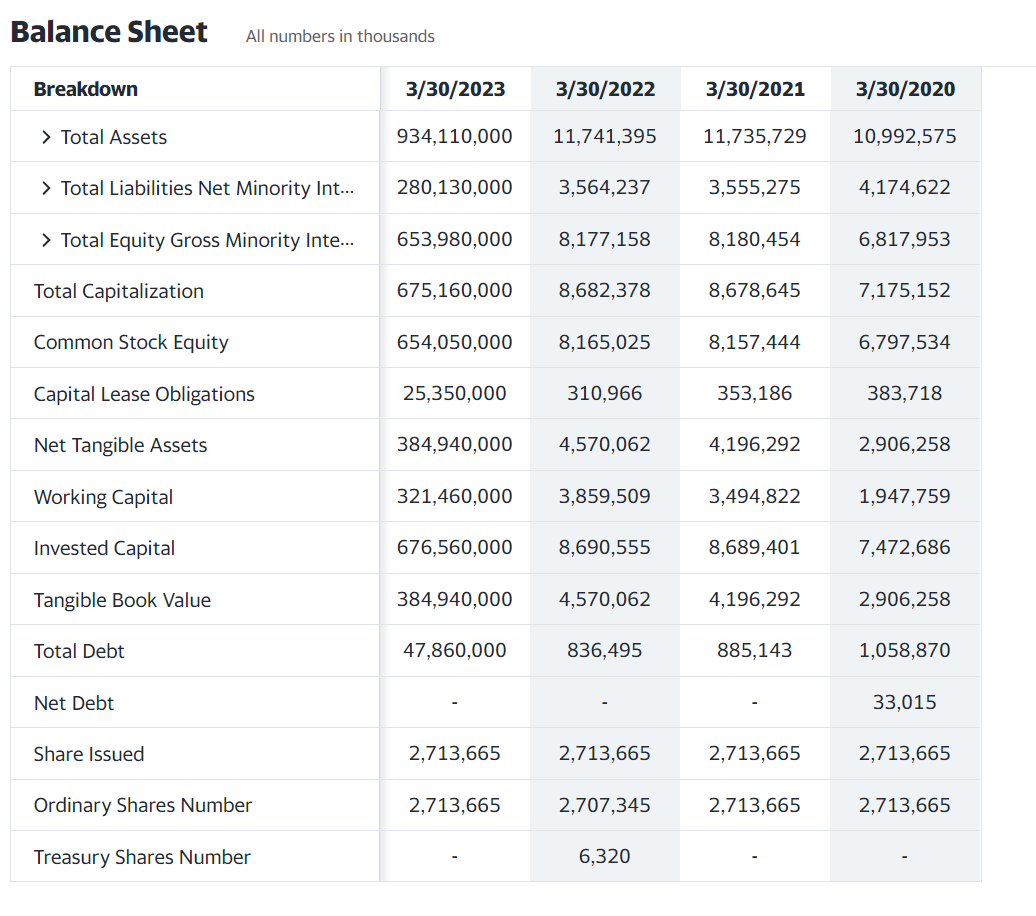

In [ ]:
debt_hcl=47860000
equity_hcl=653980000
debt_to_equity_hcl=debt_hcl/equity_hcl
print('Debt to Equity Ratio of HCL Technologies Limited: ',debt_to_equity_hcl)


Debt to Equity Ratio of HCL Technologies Limited:  0.0731826661365791


# LTIMindtree Limited Balance Sheet
Source:- https://finance.yahoo.com/quote/LTIM.BO/balance-sheet?p=LTIM.BO

In [ ]:
debt_ltim=15412000
equity_ltim=165992000
debt_to_equity_ltim=debt_ltim/equity_ltim
print('Debt to Equity Ratio of LTIMindTree: ',debt_to_equity_ltim)


Debt to Equity Ratio of LTIMindTree:  0.09284784808906453


# Tech Mahindra Limited Balance Sheet
Source:- https://finance.yahoo.com/quote/TECHM.BO/balance-sheet?p=TECHM.BO

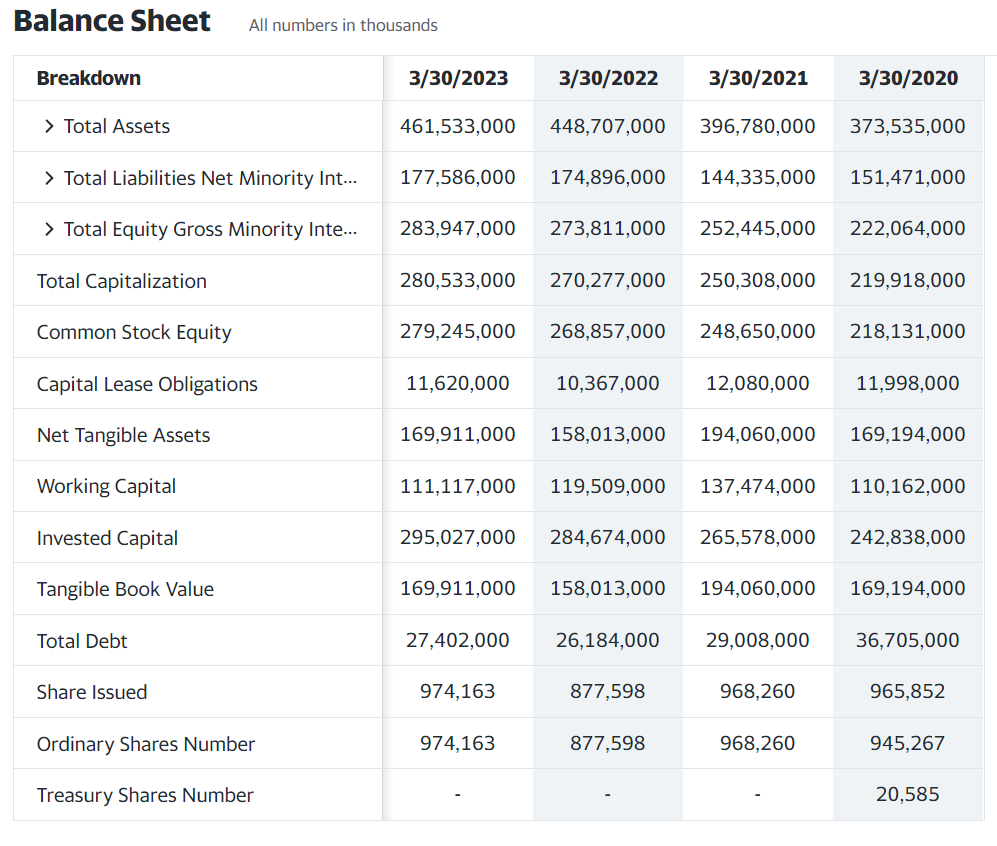

In [ ]:
debt_techm=27402000
equity_techm=283947000
debt_to_equity_techm=debt_techm/equity_techm
print('Debt to Equity Ratio of Tech Mahindra: ',debt_to_equity_techm)


Debt to Equity Ratio of Tech Mahindra:  0.09650392502826231


In [ ]:
debt_to_equity_comparable=[debt_to_equity_infosys,debt_to_equity_hcl,debt_to_equity_ltim,debt_to_equity_techm]
Beta_Levered_comparable=[model_infosys.params[1],model_hcl.params[1],model_ltim.params[1],model_techm.params[1]]
Beta_Unlevered_comparable=[]
print(Beta_Levered_comparable)
for i in range(len(Beta_Levered_comparable)):
    unlevered=(Beta_Levered_comparable[i])/(1+debt_to_equity_comparable[i]*(1-TaxRate))
    Beta_Unlevered_comparable.append(unlevered)
print(Beta_Unlevered_comparable)
Industry_Beta=np.sum(Beta_Unlevered_comparable)/4
print(Industry_Beta)

[0.6519227859353005, 0.8191494675786924, 0.9851850718239624, 0.8663510305616122]
[0.602448106744198, 0.7765281664172687, 0.9210471382431141, 0.8078784495650327]
0.7769754652424035


In [ ]:
debt_wipro=174666000
equity_wipro=781753000
debt_to_equity_wipro=debt_wipro/equity_wipro
print('Debt to Equity Ratio of Wipro: ',debt_to_equity_wipro)


Debt to Equity Ratio of Wipro:  0.22342862771233368


In [ ]:
Beta_Levered_Wipro=(Industry_Beta)*(1+(debt_to_equity_wipro)*(1-TaxRate))
print(Beta_Levered_Wipro)

0.9071743867163502


In [ ]:
mvd_wipro=debt_wipro
mve_wipro=mvd_wipro*debt_to_equity_wipro
print("Market Value of Equity for Wipro is: ",mve_wipro)

Market Value of Equity for Wipro is:  39025384.688002475


In [ ]:
debt_weight=1/(1+(1/debt_to_equity_wipro))
equity_weight=1/(1+debt_to_equity_wipro)
Cost_of_Equity_Wipro=Risk_Free_Rate+Beta_Levered_Wipro*(Expected_market_return-Risk_Free_Rate)

R_wacc=Cost_of_Equity_Wipro*(equity_weight)+Cost_of_Debt*(1-TaxRate)*debt_weight
print("Cost of Capital to Wipro: ",R_wacc)
print(Cost_of_Debt)

Cost of Capital to Wipro:  0.09480186448713977
0.0632
